# Теоретический материал – Нейронные сети
Обучение персептрона  
Персептрон представляет собой элементарную часть нейронной сети. Одиночный персептрон является линейным бинарным классификатором. В этой лекции мы рассмотрим процедуру обучения персептрона для классификации данных. Поскольку персептрон представляет собой бинарный классификатор, то мы будем рассматривать лишь два класса.  
Пусть мы рассматриваем некоторое множество (конечное или бесконечное) n-мерных векторов, которые будем обозначать 𝑥=(𝑥1,𝑥2,...,𝑥𝑛)  
Будем считать, что это множество разбивается на два класса, которые мы будем обозначать +1 и -1. Поэтому возникает задача построения функции, которая задана на нашем множестве векторов, и принимает значения в множестве {+1,−1}. В качестве такой функции может выступать персептрон. С алгебраической точки зрения персептрон состоит из вектора весов 𝑤=(𝑤0,𝑤1,𝑤2,...,𝑤𝑛).  
При этом персептрон работает по формуле  
𝑦=𝑠𝑖𝑔𝑛(𝑤0 + 𝑥1𝑤1 + 𝑥2𝑤2 + ...+ 𝑥𝑛𝑤𝑛),  
где функция 𝑠𝑖𝑔𝑛(𝑡) равна +1, если 𝑡 ≥ 0, и равна −1, если 𝑡 < 0.  
Приведем алгоритм обучения персептрона. Пусть у нас есть набор обучающих данных {(𝑥,𝑑)}, где 𝑥 - это различные вектора, а 𝑑 из множества {+1,−1} указывает к какому классу относится наш вектор.  

1. Положим вектор весов 𝑤 равным нулю.
2. Повторять 𝑁 раз следующие шаги:
3. Для каждого тестового набора (𝑥,𝑑):
4. Вычислить 𝑦 = 𝑠𝑖𝑔𝑛[(𝑥,𝑤)].
5. Если 𝑦𝑑 < 0, то скорректировать веса 𝑤0 = 𝑤0 + 𝑎𝑑,𝑤𝑖 = 𝑤𝑖 + 𝑎𝑑𝑥𝑖,𝑖 = 1,2,...,𝑛.  

Описанный алгоритм довольно легко программировать.
# 1.1.1 Пример
**Задача:**  
Рассмотрим программу обучения персептрона на языке Python. Сначала рассмотрим основной класс персептрона, который умеет учиться по тестовым данным.  
**Решение:**  
Начнем с описания объектов класса:

In [9]:
class Perceptron:
    def __init__(self,N):
        self.w = [0]*N
        
    def calc(self,x):
        res=0
        for i in range(len(self.w)):
            res += self.w[i]*x[i]
        return res
    
    def sign(self,x):
        return 1 if self.calc(x)>0 else -1
    
    def learn(self,la,x,y):
        if y*self.calc(x) <= 0:
            for i in range(len(self.w)):
                self.w[i] += la*y*x[i]
                
    def learning(self,la,T):
        for n in range(100):
            for t in T:
                self.learn(la,t[0],t[1])
    
perceptron = Perceptron(2)
la = 0.1
T = list()
T.append([[2,1],1])
T.append([[3,2],1])
T.append([[4,1],1])
T.append([[1,2],-1])
T.append([[2,3],-1])
T.append([[5,7],-1])
perceptron.learning(la,T)
print(perceptron.w)
print(perceptron.sign([1.5,2]))
print(perceptron.sign([3,1.5]))
print(perceptron.sign([5,1]))
print(perceptron.sign([5,10]))

[0.1, -0.1]
-1
1
1
-1


# Теоретический материал – Реализация нейронной сети на Python
Нейронная сеть — это функциональная единица машинного или глубокого обучения. Она имитирует поведение человеческого мозга, поскольку основана на концепции биологических нейронных сетей.  
Наиболее распространенный тип нейронной сети, называемый многослойным персептроном (MLP), представляет собой функцию, которая отображает входные данные в выходные данные. MLP имеет один входной слой и один выходной слой. Между ними может быть один или несколько скрытых слоев. Входной слой имеет тот же набор нейронов, что и признаки. Скрытые слои также могут иметь более одного нейрона. Каждый нейрон представляет собой линейную функцию, к которой применяется функция активации для решения сложных задач. Выход каждого слоя подается в качестве входных данных для всех нейронов следующих слоев.
Нейронные сети способны решать множество задач. В основном они состоят из таких компонентов:  

- входной слой (получение и передача данных);  
- скрытый слой (вычисление);  
- выходной слой. Чтобы реализовать нейросеть, необходимо понимать, как ведут себя нейроны. Нейрон одновременно принимает несколько входов, обрабатывает эти данные и выдает один выход. Нейронная сеть представляет собой блоки ввода и вывода, где каждое соединение имеет соответствующие веса (это сила связи нейронов; чем вес больше, тем один нейрон сильнее влияет на другой). Данные всех входов умножаются на веса:  
- 𝑥 → 𝑥∗𝑤1;  
- 𝑦 → 𝑦∗𝑤2.  

Входы после взвешивания суммируются с прибавлением значения порога «c»: 
<center>𝑥𝑤1 + 𝑦𝑤2 + 𝑐</center>  
Полученное значение пропускается через функцию активации (сигмоиду), которая преобразует входы в один выход:  
<center>𝑧 =𝑓(𝑥𝑤1 + 𝑦𝑤2 + 𝑐).</center>
Так выглядит сигмоида:  

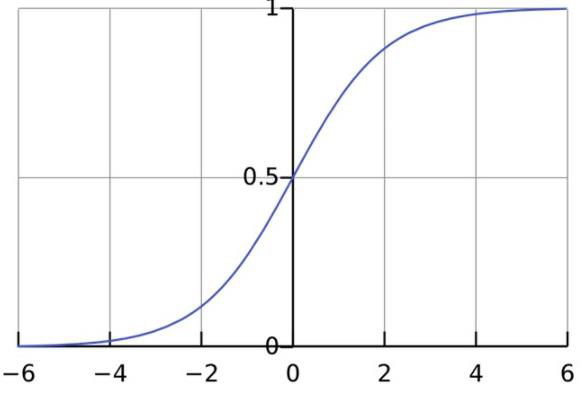

Интервал результатов сигмоиды — от 0 до 1. Отрицательные числа стремятся к нулю, а положительные — к единице.  
Например. Пусть нейрон имеет следующие значения: 𝑤 = [0,1] 𝑐 = 4.  
Входной слой: 𝑥 = 2,𝑦 = 3.  
((𝑥𝑤1) + (𝑦𝑤2)) + 𝑐 = 2\*0 + 3\*1 + 4 = 7.  
𝑧 = 𝑓(7) = 0.99.  
# 1.1.2 Пример
**Решение:**  
Для написания кода нейрона будем использовать библиотеку Python - NumPy:

In [10]:
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))
class Neuron:
    def __init__(self,weights,bias):
        self.weights = weights
        self.bias =bias
    def feedforward(self,inputs):
        total = np.dot(self.weights,inputs)+self.bias
        return sigmoid(total)
    
weights = np.array([0,1])
bias = 4
n = Neuron(weights,bias)
x = np.array([2,3])
print(n.feedforward(x))

0.9990889488055994


Нейросеть состоит из множества соединенных между собой нейронов. Пример несложной нейронной сети:  
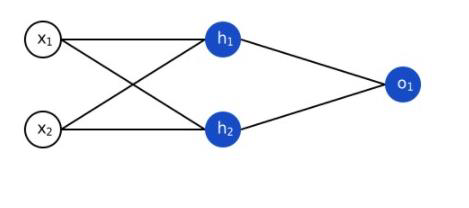  
где:  
x1,x2 - входной слой;
h1,h2 - скрытый слой с двумя нейронами:
o1 - выходной слой.
Например. Представим, что нейроны из графика выше имеют веса [0,1]. Пороговое значение (𝑏) у обоих нейронов равно 0 и они имеют идентичную сигмоиду.  
При входных данных 𝑥=[2,3] получим:  
ℎ1 = ℎ2 = 𝑓(𝑤𝑥+𝑏) = 𝑓((02) + (1∗3) +0) = 𝑓(3) = 0.95.  
𝑜1 = 𝑓(𝑤∗[ℎ1,ℎ2] +𝑏) = 𝑓((0ℎ1) + (1ℎ2) +0) = 𝑓(0.95) = 0.72.  
Входные данные по нейронам передаются до тех пор, пока не получатся выходные значения.

In [12]:
import numpy as np
class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([0,1])
        bias = 0
        self.h1 = Neuron(weights,bias)
        self.h2 = Neuron(weights,bias)
        self.o1 = Neuron(weights,bias)
    def feedforward(self,x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1,out_h2]))
        return out_o1
network = OurNeuralNetwork()
x = np.array([2,3])
print(network.feedforward(x))

0.7216325609518421


# Теоретический материал – Обучение нейронной сети
Обучение нейросети — это подбор весов, которые соответствуют всем входам для решения поставленных задач.  
Класс нейронной сети:  
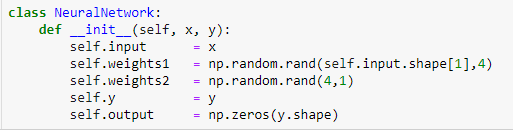  
Каждый этап процесса обучения состоит из:  

- прямого распространения (прогнозируемый выход);
- обратного распространения (обновление весов и смещений).  

Например:  
Дана двуслойная нейросеть:  
<center>ŷ = 𝜎(𝑤2𝜎(𝑤1𝑥 + 𝑏1)+ 𝑏2).</center>  
В данном случае на выход ŷ влияют только две переменные — 𝑤 (веса) и 𝑏 (смещение). Настройку весов и смещений из данных входа или процесс обучения нейросети можно изобразить так:  

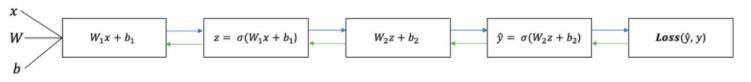  

**Прямое распространение.**  
Как видно, формула прямого распространения представляет собой несложное вычисление:  
<center>ŷ = 𝜎(𝑤2𝜎(𝑤1𝑥 + 𝑏1) + 𝑏2)</center>  
Далее необходимо добавить в код функцию прямого распространения. Предположим, что смещения в этом случае будут равны 0. 

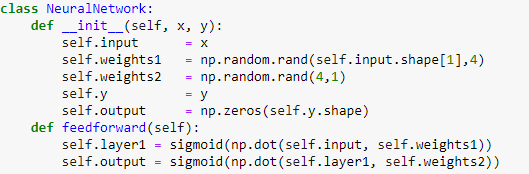

Чтобы вычислить ошибку прогноза, необходимо использовать функцию потери. В примере уместно воспользоваться формулой суммы квадратов ошибок — средним значением между прогнозируемым и фактическим результатами:    

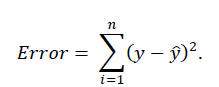  

**Обратное распространение**  
Обратное распространение позволяет измерить производные в обратном порядке — от конца к началу, и скорректировать веса и смещения. Для этого необходимо узнать производную функции потери — тангенс угла наклона.  

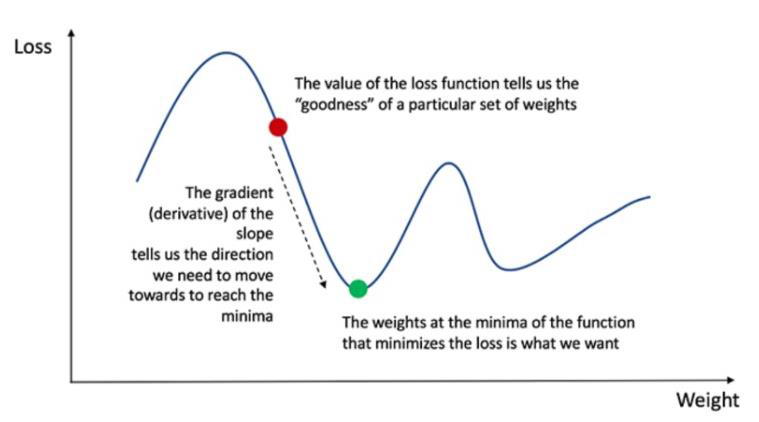  

Производная функции по отношению к весам и смещениям позволяет узнать градиентный спуск. Производная функции потери не содержит весов и смещений, для ее вычисления необходимо добавить правило цепи:  

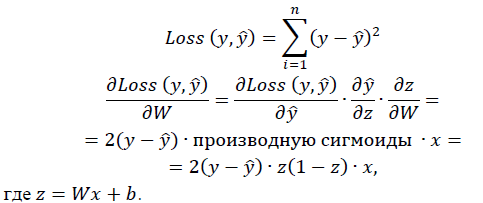

Благодаря этому правилу можно регулировать веса. Добавляем в код Python функцию обратного распространения:  

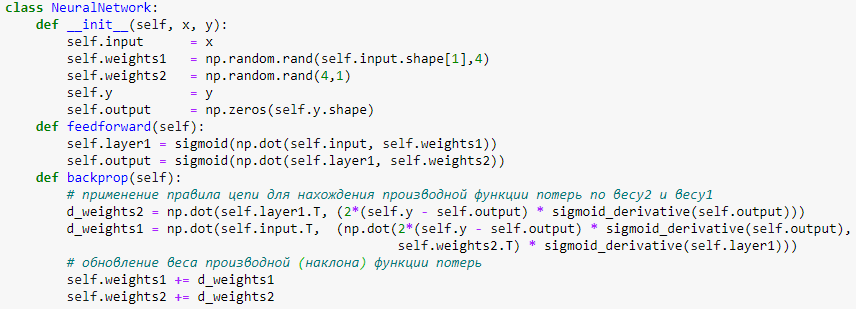

Нейронные сети базируются на определенных алгоритмах и математических функциях. Сначала может казаться, что разобраться в них довольно сложно. Но существуют готовые библиотеки машинного обучения для построения и тренировки нейросетей, позволяющие не углубляться в их устройство.  
# Задание:
Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork. Данные нейросети:  

- три входа (𝑥1,𝑥2,𝑥3);
- три нейрона в скрытых слоях (ℎ1,ℎ2,ℎ3);
- выход (𝑜1).  

Нейроны имеют идентичные веса и пороги:  

- 𝑤 = [0.5,0.5,0.5]
- 𝑏 = 0  

Данные нейросети:  

- два входа (𝑥1,𝑥2);
- два нейрона в скрытых слоях (ℎ1,ℎ2);
- два выхода (𝑜1,𝑜2).  

Нейроны имеют идентичные веса и пороги:  

- 𝑤 = [1,0];
- 𝑏 = 1.  

**Решение:**

In [17]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))
class Neuron:
    def __init__(self,weights,bias):
        self.weights = weights
        self.bias =bias
    def feedforward(self,inputs):
        total = np.dot(self.weights,inputs)+self.bias
        return sigmoid(total)
    
class OurNeuralNetwork1:
    def __init__(self):
        weights = np.array([0.5,0.5,0.5])
        bias = 0
        self.h1 = Neuron(weights,bias)
        self.h2 = Neuron(weights,bias)
        self.h3 = Neuron(weights,bias)
        self.o1 = Neuron(weights,bias)
    def feedforward(self,x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1,out_h2,out_h3]))
        return out_o1
    
class OurNeuralNetwork2:
    def __init__(self):
        weights = np.array([1,0])
        bias = 1
        self.h1 = Neuron(weights,bias)
        self.h2 = Neuron(weights,bias)
        self.o1 = Neuron(weights,bias)
        self.o2 = Neuron(weights,bias)
    def feedforward(self,x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1,out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h1,out_h2]))
        return [out_o1,out_o2]
network1 = OurNeuralNetwork1()
x = np.array([2,2,3])
print(network1.feedforward(x))

network2 = OurNeuralNetwork2()
x = np.array([2,3])
print(network2.feedforward(x))

0.810924976111517
[0.8757270529783324, 0.8757270529783324]


# Задание:
Реализуйте классы нейронных сетей с использованием других функций активации.  
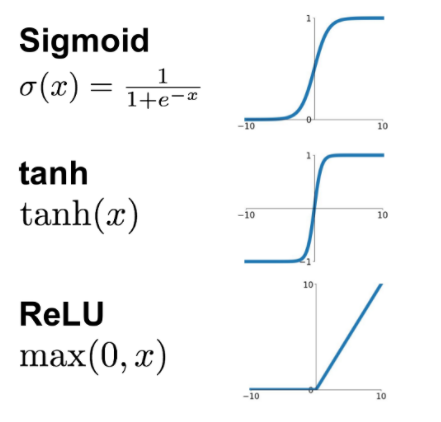  

**Решение:**

In [23]:
import numpy as np
import math

def sigmoid(x):
    return 1/(1+np.exp(-x))
def tanh(x):
    return np.tanh(x)
def ReLu(x):
    return max(0,x)

class Neuron:
    def __init__(self,weights,bias):
        self.weights = weights
        self.bias =bias
    def feedforward(self,inputs,f):
        total = np.dot(self.weights,inputs)+self.bias
        if f == "sigmoid":
            return sigmoid(total)
        if f == "tanh":
            return tanh(total)
        if f == "relu":
            return ReLu(total)
    
class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([0,1])
        bias = 0
        self.h1 = Neuron(weights,bias)
        self.h2 = Neuron(weights,bias)
        self.o1 = Neuron(weights,bias)
    def feedforward(self,x,func):
        out_h1 = self.h1.feedforward(x,func)
        out_h2 = self.h2.feedforward(x,func)
        out_o1 = self.o1.feedforward(np.array([out_h1,out_h2]),func)
        return out_o1

network = OurNeuralNetwork()
x = np.array([1,3])
print(network.feedforward(x,"sigmoid"))
print(network.feedforward(x,"tanh"))
print(network.feedforward(x,"relu"))

0.7216325609518421
0.7595094447988621
3


# 1.2. Введение в нейронные сети с помощью Scikit-Learn в Python
Теперь мы знаем, что такое нейронные сети и какие шаги необходимо выполнить, чтобы построить простую нейронную сеть с плотными связями. В этом разделе мы попытаемся построить простую нейронную сеть, которая предсказывает класс, к которому принадлежит данное растение ириса. Мы будем использовать библиотеку Python Scikit-Learn для создания нашей нейронной сети.
Sklearn предоставляет 2 оценщика для задач классификации и регрессии соответственно:
− MLPClassifier;
− MLPRegressor
Начнем с импорта необходимых библиотек.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# MLPClassifier
Загрузка данных  
Мы будем загружать два набора данных.  
Набор данных цифр: мы будем использовать набор данных цифр, который имеет изображения размером 8x8 для цифр 0-9. Ниже мы будем использовать цифровые данные для задач классификации.  
Набор данных о жилье в Бостоне: мы будем использовать набор данных о жилье в Бостоне, который содержит информацию о различных свойствах дома, таких как среднее количество комнат, уровень преступности на душу населения в городе и т. д. Мы будем использовать его для задач регрессии.  
Sklearn предоставляет оба этих набора данных. Мы можем загрузить их, вызвав методы load_digits() и load_boston().  

In [2]:
from sklearn.datasets import load_digits, load_boston

digits = load_digits()
x_digits, y_digits = digits.data,digits.target
print("Dataset sizes: ",x_digits.shape, y_digits.shape)

Dataset sizes:  (1797, 64) (1797,)


In [3]:
boston = load_boston()
x_boston, y_boston = boston.data,boston.target
print("Dataset sizes: ",x_boston.shape, y_boston.shape)

Dataset sizes:  (506, 13) (506,)


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

Классификация  
MLPClassifier — это класс, доступный как часть модуля neuro_network sklearn для выполнения задач классификации с использованием многослойного персептрона.
Как обычно разделим набор данных на две части:  

- данные обучения, которые будут использоваться для модели обучения;
- тестовые данные, по которым будет проверяться точность обученной модели.  

Функция train_test_split модуля model_selection sklearn поможет нам разделить данные на два набора: 80% для обучения и 20% для тестирования. Мы также используем seed(random_state=123) с train_test_split, чтобы мы всегда получали одно и то же разделение и могли сравнивать и воспроизволить результаты в будущем.

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_digits,y_digits,train_size=0.8,test_size=0.2,stratify=y_digits,random_state=123)
print('Train/Test sizes: ',x_train.shape,x_test.shape,y_train.shape,y_test.shape)

Train/Test sizes:  (1437, 64) (360, 64) (1437,) (360,)


Для начала натренируем модель MLPClassifier с параметрами по умолчанию для тренировочных данных.

In [9]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(x_train,y_train)

MLPClassifier(random_state=123)

In [10]:
y_preds = mlp_classifier.predict(x_test)
print(y_preds[:15])
print(y_test[:15])
print("Test accuracy: %.3f"%mlp_classifier.score(x_test,y_test))
print("Trainig accuracy: %.3f"%mlp_classifier.score(x_train,y_train))

[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
Test accuracy: 0.983
Trainig accuracy: 1.000


Cоздадим метод plot_confusion_matrix(), который принимает исходные и предсказанные метки данных по модели. Затем он строит матрицу путаницы, используя matplotlib.

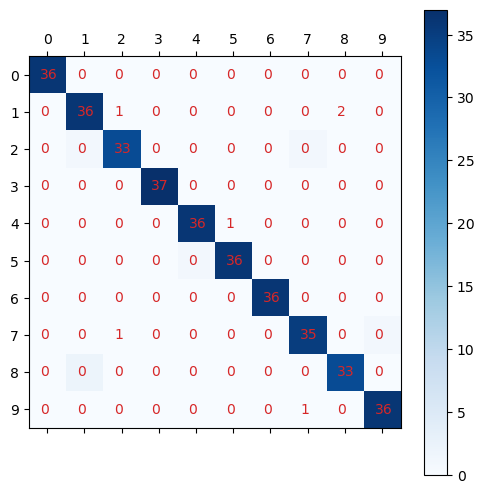

In [12]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test,y_preds):
    conf_mat = confusion_matrix(y_test,y_preds)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat,cmap=plt.cm.Blues,fignum=1)
    plt.yticks(range(10),range(10))
    plt.xticks(range(10),range(10))
    plt.colorbar()
    for i in range(10):
        for j in range(10):
            plt.text(i-0.2,j+0.1,str(conf_mat[i,j]),color='tab:red')
plot_confusion_matrix(y_test,mlp_classifier.predict(x_test))

Ниже приведен список важных атрибутов, доступных с MLPClassifier, которые могут предоставить значимую информацию после обучения модели.  
- loss_ — возвращает убыток после завершения процесса обучения.
- coefs_ — возвращает массив длины n_layers-1, где каждый элемент представляет веса, связанные с уровнем i.
- intercepts_ — возвращает массив длины n_layers-1, где каждый элемент представляет собой перехват, связанный с персептронами слоя i.
- n_iter_ — количество итераций, для которых выполнялась оценка.
- out_activation_ — возвращает имя функции активации выходного слоя.  

In [14]:
print("Loss: ",mlp_classifier.loss_)
print("Number of coefs: ",len(mlp_classifier.coefs_))
print("Number of intercepts: ",len(mlp_classifier.intercepts_))
print("Number of iterations for which estimator ran: ",mlp_classifier.n_iter_)
print("Name of output layer activation function: ",mlp_classifier.out_activation_)

Loss:  0.0034728684994180608
Number of coefs:  2
Number of intercepts:  2
Number of iterations for which estimator ran:  125
Name of output layer activation function:  softmax


# MLPRegressor
MLPRegressor — это класс, доступный как часть библиотеки neuro_network sklearn для выполнения задач регрессии с использованием многослойного персептрона. Также разделим набор данных на две части:  

- данные обучения (80%), которые будут использоваться для модели обучения;
- тестовые данные (20%), по которым будет проверяться точность обученной модели.

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x_boston,y_boston,train_size=0.8,test_size=0.2,random_state=123)
print("Train/test sizes: ",x_train.shape,x_test.shape,y_train.shape,y_test.shape)

Train/test sizes:  (404, 13) (102, 13) (404,) (102,)


In [17]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(x_train,y_train)

MLPRegressor(random_state=123)

In [18]:
y_preds = mlp_regressor.predict(x_test)

print(y_preds[:10])
print(y_test[:10])
print('Test R^2 score: %.3f'%mlp_regressor.score(x_test,y_test))
print('Training R^2 score: %.3f'%mlp_regressor.score(x_train,y_train))

[ 7.32543601 24.33417853 32.46700507 15.19086054 25.6749167  25.07797685
 27.20985668  2.62269853 15.25691994 28.02637784]
[15.  26.6 45.4 20.8 34.9 21.9 28.7  7.2 20.  32.2]
Test R^2 score: 0.462
Training R^2 score: 0.510


In [19]:
print("Loss: ",mlp_regressor.loss_)
print("Number of coefs: ",len(mlp_regressor.coefs_))
[weights.shape for weights in mlp_regressor.coefs_]

Loss:  28.538174061119612
Number of coefs:  2


[(13, 100), (100, 1)]

In [20]:
print("Number of iterations fro which estimator ran: ",mlp_regressor.n_iter_)
print("Name of output layer activation function: ",mlp_regressor.out_activation_)

Number of iterations fro which estimator ran:  130
Name of output layer activation function:  identity


# Задание
**Задача:**  
Используйте классы MLPClassified и MLPRegressor для классификации и регрессии произвольных данных из интернета. Проведите анализ атрибуты, полученных моделей. Для классификации можете взять набор данных Ирисов:   
https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv  
а для регрессии датасет зависимости заработной платы от опыта работы:   
https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv  
**Решение:**

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)
display(df.head(5))

x_df,y_df = df.drop(['variety'],axis=1), df.variety
print(x_df.shape,y_df.shape)

x_train,x_test,y_train,y_test = train_test_split(x_df,y_df,test_size=0.2,random_state=123)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(x_train, y_train)
y_preds = mlp_classifier.predict(x_test)
print(y_preds[:15])
print(y_test[:15])
print("Test accuracy: %.3f"%mlp_classifier.score(x_test,y_test))
print("Trainig accuracy: %.3f"%mlp_classifier.score(x_train,y_train))
print("Loss: ",mlp_classifier.loss_)
print("Number of coefs: ",len(mlp_classifier.coefs_))
print("Number of intercepts: ",len(mlp_classifier.intercepts_))
print("Number of iterations for which estimator ran: ",mlp_classifier.n_iter_)
print("Name of output layer activation function: ",mlp_classifier.out_activation_)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


(150, 4) (150,)
(120, 4) (30, 4) (120,) (30,)
['Versicolor' 'Virginica' 'Virginica' 'Versicolor' 'Setosa' 'Virginica'
 'Versicolor' 'Setosa' 'Setosa' 'Versicolor' 'Virginica' 'Setosa'
 'Versicolor' 'Virginica' 'Virginica']
72     Versicolor
112     Virginica
132     Virginica
88     Versicolor
37         Setosa
138     Virginica
87     Versicolor
42         Setosa
8          Setosa
90     Versicolor
141     Virginica
33         Setosa
59     Versicolor
116     Virginica
135     Virginica
Name: variety, dtype: object
Test accuracy: 0.967
Trainig accuracy: 0.975
Loss:  0.3012607394074939
Number of coefs:  2
Number of intercepts:  2
Number of iterations for which estimator ran:  200
Name of output layer activation function:  softmax


/Users/aleksandrlazarev/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
df = pd.read_csv(url)

# Splitting the data into features and target
x_df, y_df = df.iloc[:, :-1], df.iloc[:, -1]

# Splitting the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=10)

# Standardizing the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Training the MLPRegressor model
mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(x_train_scaled, y_train)

# Predicting and evaluating the model
y_preds = mlp_regressor.predict(x_test_scaled)
test_score = mlp_regressor.score(x_test_scaled, y_test)
train_score = mlp_regressor.score(x_train_scaled, y_train)

print("Test Score: ", test_score)
print("Training Score: ", train_score)
print("Loss: ",mlp_regressor.loss_)
print("Number of coefs: ",len(mlp_regressor.coefs_))
print("Number of intercepts: ",len(mlp_regressor.intercepts_))
print("Number of iterations for which estimator ran: ",mlp_regressor.n_iter_)
print("Name of output layer activation function: ",mlp_regressor.out_activation_)

Test Score:  -7.617095353111319
Training Score:  -8.58991152318571
Loss:  3489568405.242207
Number of coefs:  2
Number of intercepts:  2
Number of iterations for which estimator ran:  200
Name of output layer activation function:  identity


/Users/aleksandrlazarev/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
